<a href="https://colab.research.google.com/github/shaaidaar/creditcard-fraud-detection/blob/main/ML_Assignment_Fraud_Detection_DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Set Up:**
Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

**Data Loading:**

In [2]:
try:
    df = pd.read_csv('/content/drive/MyDrive/Uni/Assignments/creditcard.csv')
    # Display the first few rows of the DataFrame
    print("Data Frame First Rows:")
    display(df.head())
    # Print the shape of the DataFrame
    print("Data Frame Shape:")
    print(df.shape)
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please make sure the file is in the correct location.")
    df = None # Assign None to df in case of error

Data Frame First Rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data Frame Shape:
(284807, 31)


**EDA (Exploratory Data Analysis):**

In [ ]:
print("\nData Types:")
print(df.info())


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [ ]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+

No null values were found, and the distribution of most features is highly skewed.


Fraud Transaction Distribution:


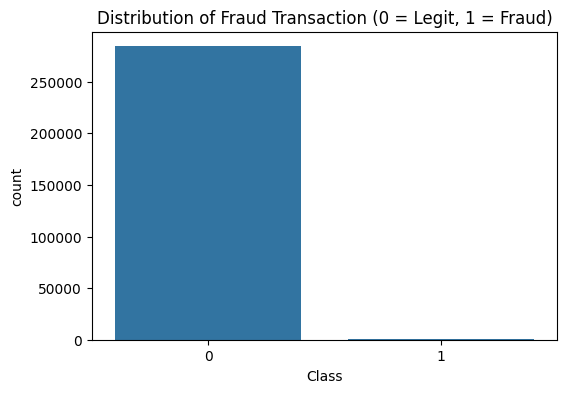

In [ ]:
# Class distribution
print("\nFraud Transaction Distribution:")
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraud Transaction (0 = Legit, 1 = Fraud)')
plt.show()

We visualize the distribution of fraud vs. non-fraud transactions. As expected, the dataset is heavily skewed toward the genuine class and is severly imbalanced.

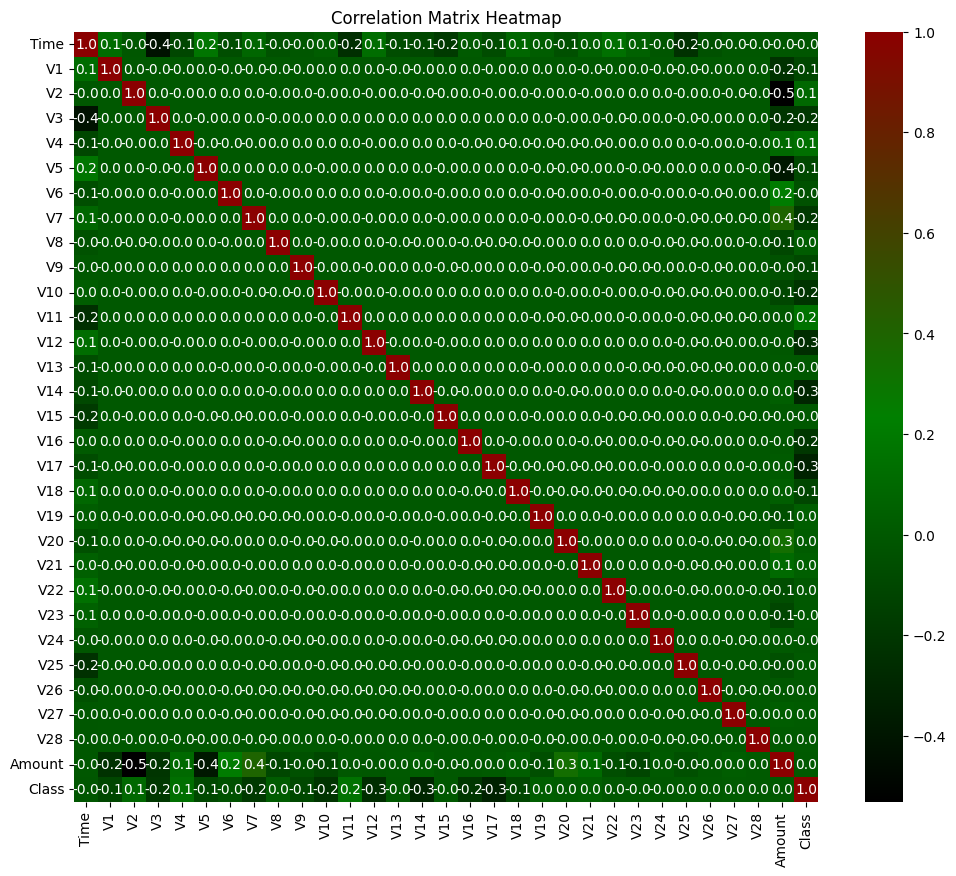

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

bgr = LinearSegmentedColormap.from_list('black_green_red', ['black', 'green', 'darkred'])

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=bgr, fmt=".1f")
plt.title('Correlation Matrix Heatmap')
plt.show()

To better understand the features' relations, I plotted a correlation matrix. As expected we can see that none of the PCA features are not correlated to each other or to the target variable (Class). However features like V17 and V14 have a slightly negative correlation with "Class". "Amount" and "Time" features also are not correlated with "Class", which makes sense because the fraud can happen at any time with any amount. The most features are independent based on the matrix which is good for the model training. [2] [link text](https://medium.com/@tarangds/a-comprehensive-guide-to-correlation-matrix-missing-data-and-multicollinearity-0e6ce414bd38)

**Data Preprocessing:**

No missing values were found in the initial exploration, so no imputation is needed.

Finding and Dropping duplicated data:

In [ ]:
print(df.duplicated().sum())
data_no_duplicates = df.drop_duplicates()
print(data_no_duplicates.duplicated().sum())

1081
0


In [ ]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print(":D" * 10)

Duplicated values dropped succesfully
:D:D:D:D:D:D:D:D:D:D


**Checking for Outliers:**

We inspect 'Amount' and 'Time' features for outliers using boxplots, as these are the only non-PCA features. However, we will not remove the outliers  to because we have rare fraud records and don't want to lose any of them.

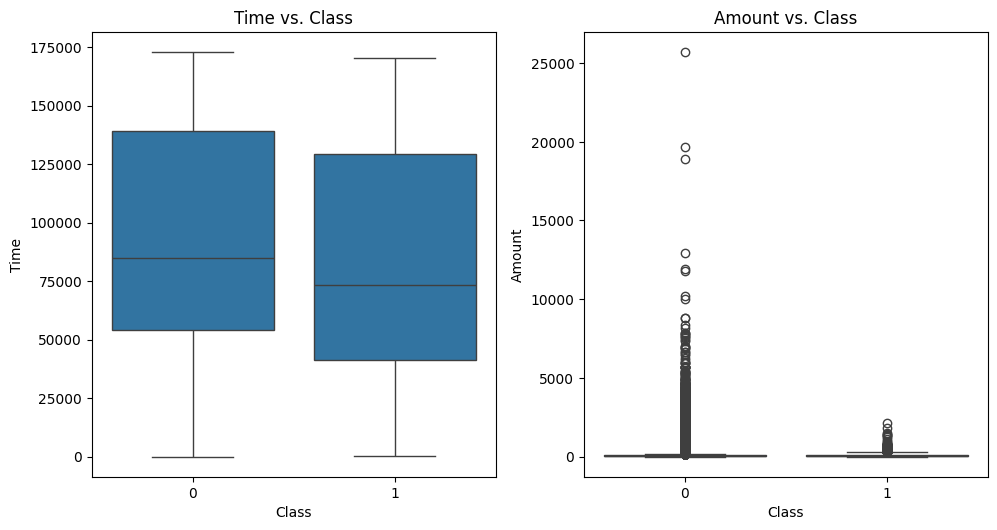

In [ ]:
numerical_features = ['Time', 'Amount']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs. Class')
plt.tight_layout()
plt.show()

Boxplots confirm that there are significant outliers in the "Amount" feature.

In [3]:
df = df.drop(['Time'], axis=1)

I decided to drop "Time" column since it is not informative much and its correlation to the target value "Class" is near zero.

**Feature Scaling**

In [4]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
scaler = StandardScaler()

df_scaled['Amount'] = scaler.fit_transform(df[['Amount']])



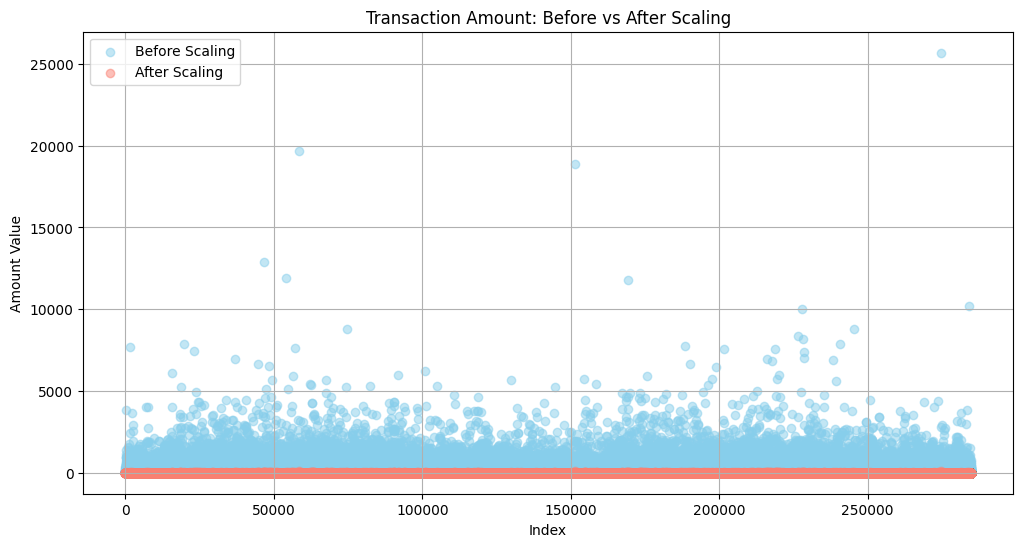

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot of 'Amount' before scaling
plt.scatter(df.index, df['Amount'], alpha=0.5, label='Before Scaling', color='skyblue')

# Scatter plot of Amount after scaling
plt.scatter(df_scaled.index, df_scaled['Amount'], alpha=0.5, label='After Scaling', color='salmon')

plt.xlabel('Index')
plt.ylabel('Amount Value')
plt.title('Transaction Amount: Before vs After Scaling')
plt.legend()
plt.grid(True)
plt.show()

The above plot is showing the "Amount" feature value, before and after scaling it.

**Split the data into training and testing sets:**

In [5]:
from sklearn.model_selection import train_test_split

#Defining features and the target "Class"
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Fraud ratio in train: {y_train.mean():.4f}")
print(f"Fraud ratio in test: {y_test.mean():.4f}")



Training set shape: (199364, 29)
Test set shape: (85443, 29)
Fraud ratio in train: 0.0017
Fraud ratio in test: 0.0017


**Model Selection and Design:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Setting up the Logistic Regression model and train it with training set
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Check the prediction of the model on the test set
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

#Repeating the same for 3 other models:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]


**Model Evaluation:**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

models = {'Logistic Regression': lr_model, 'Random Forest': rf_model, 'XGBoost': xgb_model, 'SVM': svm_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}\n")

Confusion Matrix:
[[84960    16]
 [   61    81]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.57      0.68       142

    accuracy                           1.00     85118
   macro avg       0.92      0.79      0.84     85118
weighted avg       1.00      1.00      1.00     85118

Logistic Regression ROC AUC Score: 0.9673

Confusion Matrix:
[[84971     5]
 [   33   109]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.77      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.93     85118
weighted avg       1.00      1.00      1.00     85118

Random Forest ROC AUC Score: 0.9240

Confusion Matrix:
[[84969     7]
 [   36   106]]
XGBoost Classification Report:
        

Considering the compiling took time, I decided to create plots the confusion matrix for each model with manually feeding the numbers for the matrices and also ROC AUC scores in the code

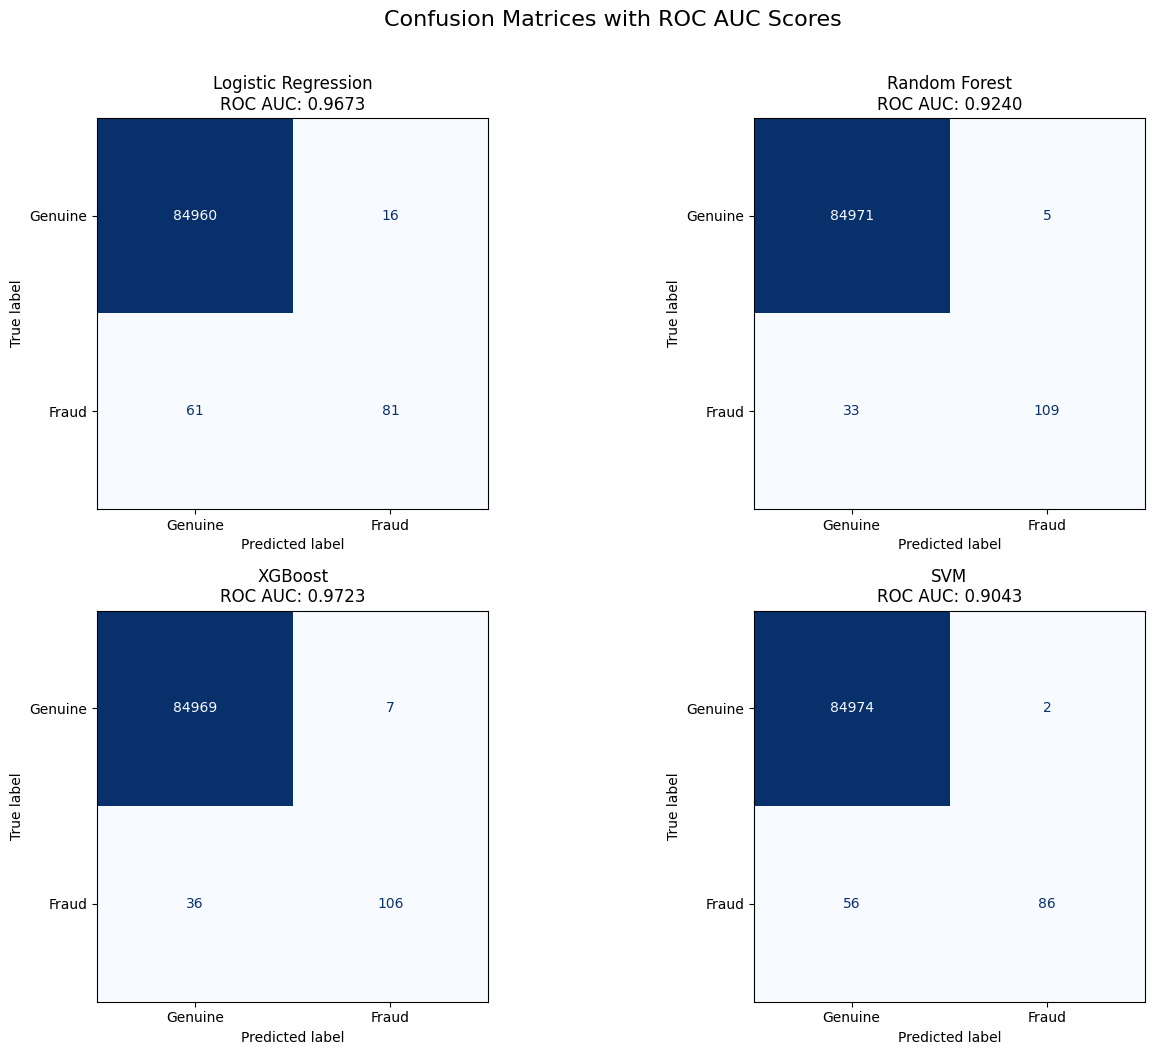

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Define model names and their confusion matrices
model_results = {
    "Logistic Regression": np.array([[84960, 16], [61, 81]]),
    "Random Forest": np.array([[84971, 5], [33, 109]]),
    "XGBoost": np.array([[84969, 7], [36, 106]]),
    "SVM": np.array([[84974, 2], [56, 86]])
}

# Define ROC AUC scores
roc_auc_scores = {
    "Logistic Regression": 0.9673,
    "Random Forest": 0.9240,
    "XGBoost": 0.9723,
    "SVM": 0.9043
}

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, (model, cm) in enumerate(model_results.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Genuine', 'Fraud'])
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f"{model}\nROC AUC: {roc_auc_scores[model]:.4f}", fontsize=12)

plt.tight_layout()
plt.suptitle("Confusion Matrices with ROC AUC Scores", fontsize=16, y=1.05)
plt.show()

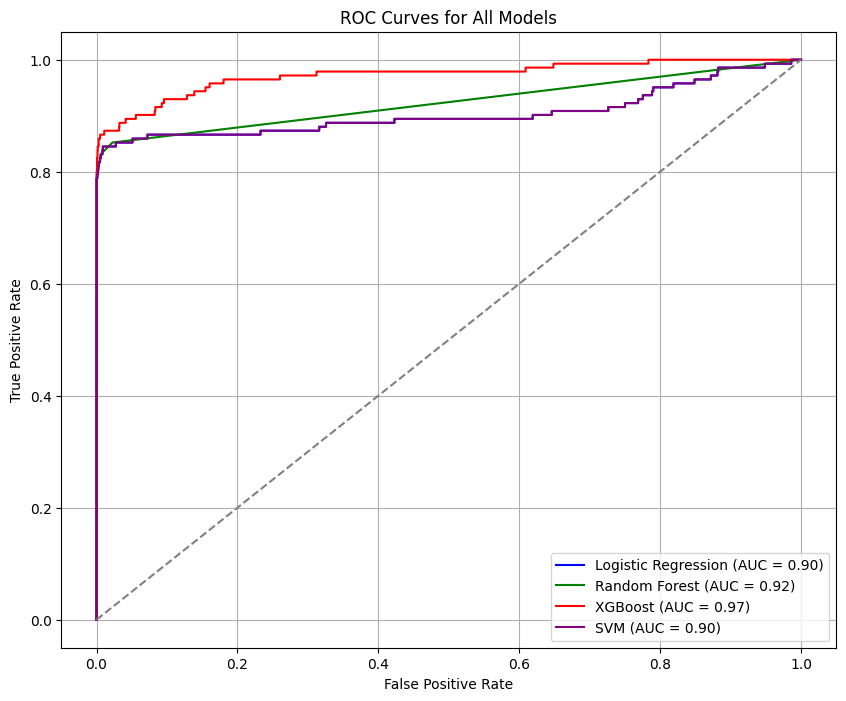

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_svm, tpr_svm, color='purple', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

ROC curve compares Logistic Regression, Random Forest, XGBoost, and SVM models in terms of True Positive Rate (TPR) vs False Positive Rate (FPR).

What we observe:
*   XGBoost (red) performs the best with the highest AUC = 0.97. Its curve stays closer to the top-left corner, which means it detects fraud well while minimizing false alarms
*   Random Forest (green) is second best with AUC = 0.92.
*   Logistic Regression and SVM (blue and purple) are similar, both with AUC = 0.90.



So in terms of ROC-AUC, XGBoost outperforms the others.

**Precision-Recal Curve**

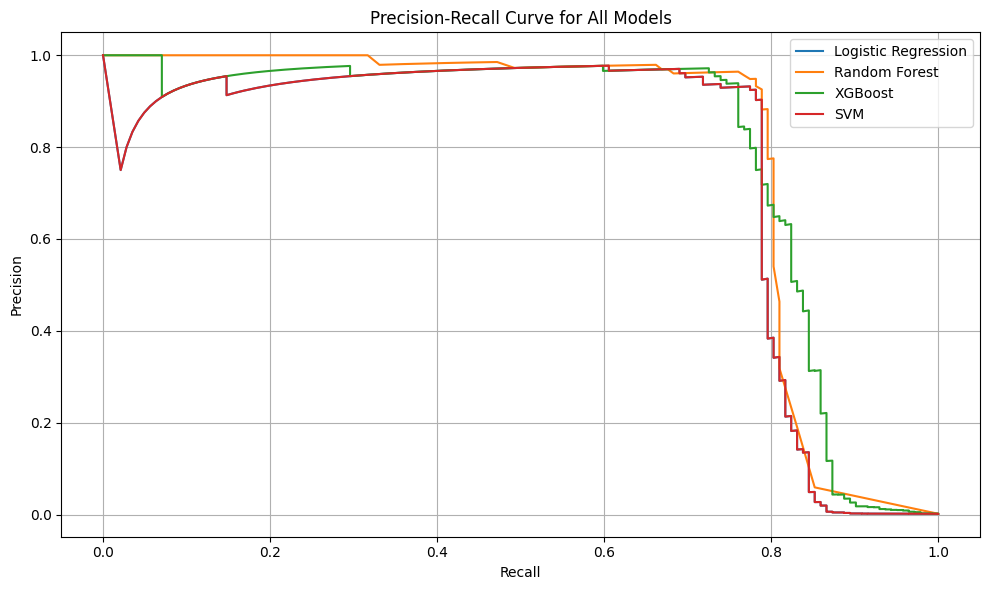

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Prepare model predictions and labels
models_probas = {
    'Logistic Regression': y_proba,
    'Random Forest': y_proba_rf,
    'XGBoost': y_proba_xgb,
    'SVM': y_proba_svm
}

plt.figure(figsize=(10, 6))

for name, probas in models_probas.items():
    precision, recall, _ = precision_recall_curve(y_test, probas)
    plt.plot(recall, precision, label=f"{name}")

# Add plot details
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


*   X-axis (Recall): Proportion of actual frauds correctly identified (True Positives / (True Positives + False Negatives))
*   Y-axis (Precision): How many actual fraud we had out of all predicted frauds (True Positives / (True Positives + False Positives)) -

XGBoost has great performance in detecting fraud with minimal false positives.


**T-SNE on full dataset**

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[y_train == 0, 0], X_tsne[y_train == 0, 1],
            label='Genuine', alpha=0.5, s=10, c='skyblue')
plt.scatter(X_tsne[y_train == 1, 0], X_tsne[y_train == 1, 1],
            label='Fraud', alpha=0.9, s=30, c='red', edgecolors='black')
plt.title("t-SNE projection of transactions (2D)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.grid(True)
plt.show()

**T-SNE Plot on a sample of dataset:**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


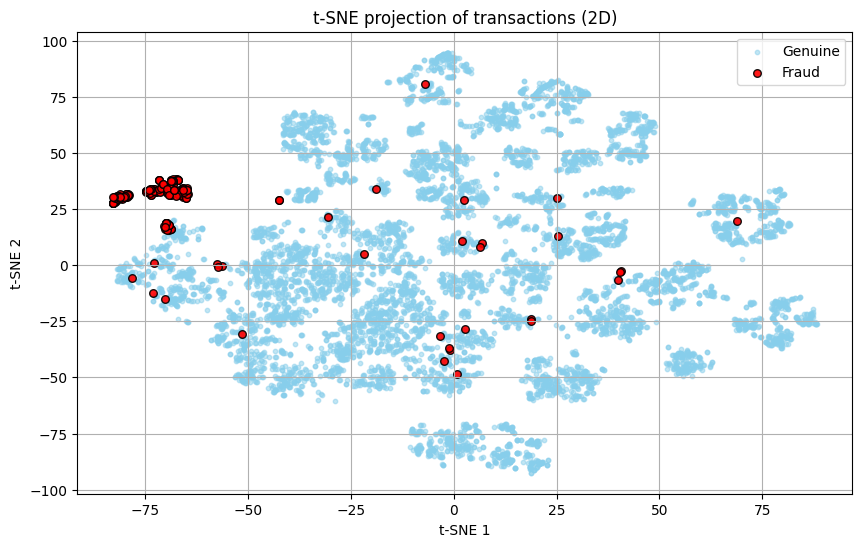

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#it was taking so much time to plot t-SNE on the full dataset
# So I sampled a subset of the data
genuine_idx = y_train[y_train == 0].sample(8000, random_state=42).index
fraud_idx = y_train[y_train == 1].sample(200, random_state=42).index
sample_idx = genuine_idx.union(fraud_idx)

X_sample = X_train.loc[sample_idx]
y_sample = y_train.loc[sample_idx]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, n_iter=1000, perplexity=30)
X_tsne = tsne.fit_transform(X_sample)


plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[y_sample == 0, 0], X_tsne[y_sample == 0, 1],
            label='Genuine', alpha=0.5, s=10, c='skyblue')
plt.scatter(X_tsne[y_sample == 1, 0], X_tsne[y_sample == 1, 1],
            label='Fraud', alpha=0.9, s=30, c='red', edgecolors='black')
plt.title("t-SNE projection of transactions (2D)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.grid(True)
plt.show()

**Balancing the dataset**
In this step we will try to balance our dataset by applying SMOTE-Tomek method:

In [7]:
from imblearn.combine import SMOTETomek
# Step 1: Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}")
print(f"Resampled training set shape: {X_resampled.shape}")

Original training set shape: (199364, 29)
Resampled training set shape: (398040, 29)


Regenerating the t-SNE plot to see the changes in our data:

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


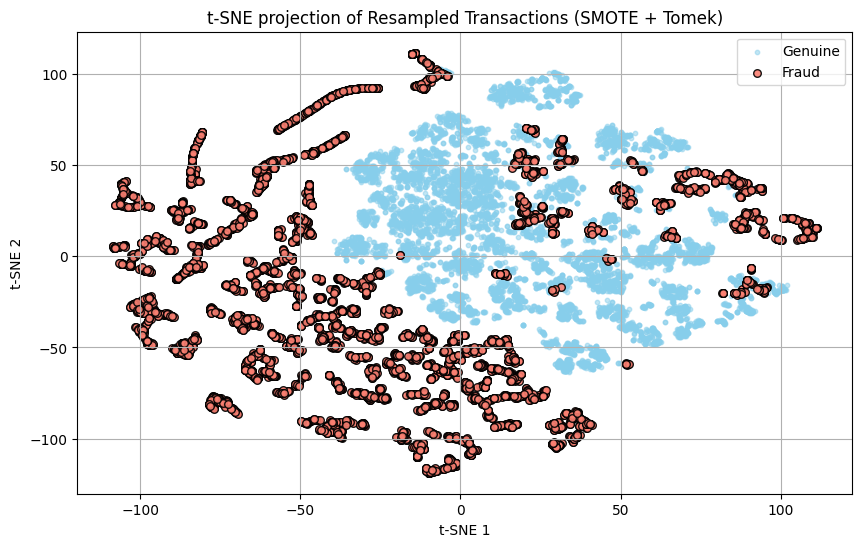

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Sample the resampled dataset (for faster t-SNE visualization)
genuine_idx_resampled = y_resampled[y_resampled == 0].sample(8000, random_state=42).index
fraud_idx_resampled = y_resampled[y_resampled == 1].sample(8000, random_state=42).index  # Balanced by SMOTE

sample_idx_resampled = genuine_idx_resampled.union(fraud_idx_resampled)
X_sample_resampled = X_resampled.loc[sample_idx_resampled]
y_sample_resampled = y_resampled.loc[sample_idx_resampled]

# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, n_iter=1000, perplexity=30)
X_tsne_resampled = tsne.fit_transform(X_sample_resampled)

# Step 3: Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne_resampled[y_sample_resampled == 0, 0], X_tsne_resampled[y_sample_resampled == 0, 1],
            label='Genuine', alpha=0.5, s=10, c='skyblue')
plt.scatter(X_tsne_resampled[y_sample_resampled == 1, 0], X_tsne_resampled[y_sample_resampled == 1, 1],
            label='Fraud', alpha=0.9, s=30, c='salmon', edgecolors='black')
plt.title("t-SNE projection of Resampled Transactions (SMOTE + Tomek)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.grid(True)
plt.show()

**Retrain and evaluate the models with the resampled data:**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

# 1) Draw a 10% stratified subset from the resampled SMOTE+Tomek data
X_sample, _, y_sample, _ = train_test_split(
    X_resampled, y_resampled,
    train_size=0.10,
    stratify=y_resampled,
    random_state=42
)
print("Sampled shape:", X_sample.shape)
print("Class counts in sample:", np.bincount(y_sample))

# 2) Split that sample into train (70%) and test (30%)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_sample, y_sample,
    test_size=0.30,
    stratify=y_sample,
    random_state=42
)
print("Train:", X_train_s.shape, "Test:", X_test_s.shape)

Sampled shape: (39804, 29)
Class counts in sample: [19902 19902]
Train: (27862, 29) Test: (11942, 29)


In [11]:
results = {
    'Model': [],
    'Pre‐Sampling ROC AUC': [],   # fill in from the old runs
    'Post‐Sampling ROC AUC': [],
    'Pre‐Sampling Recall': [],    # similarly fill
    'Post‐Sampling Recall': [],
    'Pre‐Sampling Precision': [],
    'Post‐Sampling Precision': [],
    'Pre‐Sampling F1': [],
    'Post‐Sampling F1': []
}

**Logistic Regression Model: (On small sample)**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

# 1) Logistic Regression on the sampled data
lr_res = LogisticRegression(max_iter=1000, random_state=42)
lr_res.fit(X_train_s, y_train_s)

# 2) Predict on the sampled test set
y_pred_lr_s   = lr_res.predict(X_test_s)
y_proba_lr_s  = lr_res.predict_proba(X_test_s)[:, 1]

# 3) Compute metrics
roc_auc_lr_s   = roc_auc_score(y_test_s, y_proba_lr_s)
report_lr_s    = classification_report(y_test_s, y_pred_lr_s, output_dict=True)
recall_lr_s    = report_lr_s['1']['recall']
precision_lr_s = report_lr_s['1']['precision']
f1_lr_s        = report_lr_s['1']['f1-score']

# 4) Store in results
results['Model'].append('Logistic Regression (sampled)')
results['Post‐Sampling ROC AUC'].append(roc_auc_lr_s)
results['Post‐Sampling Recall'].append(recall_lr_s)
results['Post‐Sampling Precision'].append(precision_lr_s)
results['Post‐Sampling F1'].append(f1_lr_s)

**Random Forest Model (On small sample)**

In [13]:
# 2) Random Forest on the sampled data
from sklearn.ensemble import RandomForestClassifier

rf_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_res.fit(X_train_s, y_train_s)

# Predict on the sampled test set
y_pred_rf_s  = rf_res.predict(X_test_s)
y_proba_rf_s = rf_res.predict_proba(X_test_s)[:, 1]

# Compute metrics
roc_auc_rf_s   = roc_auc_score(y_test_s, y_proba_rf_s)
report_rf_s    = classification_report(y_test_s, y_pred_rf_s, output_dict=True)
recall_rf_s    = report_rf_s['1']['recall']
precision_rf_s = report_rf_s['1']['precision']
f1_rf_s        = report_rf_s['1']['f1-score']

# Store in results
results['Model'].append('Random Forest (sampled)')
results['Post‐Sampling ROC AUC'].append(roc_auc_rf_s)
results['Post‐Sampling Recall'].append(recall_rf_s)
results['Post‐Sampling Precision'].append(precision_rf_s)
results['Post‐Sampling F1'].append(f1_rf_s)

**XGBoost Model:(On small sample)**

In [14]:
# 3) XGBoost on the sampled data
from xgboost import XGBClassifier

xgb_res = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_res.fit(X_train_s, y_train_s)

# Predict on the sampled test set
y_pred_xgb_s   = xgb_res.predict(X_test_s)
y_proba_xgb_s  = xgb_res.predict_proba(X_test_s)[:, 1]

# Compute metrics
roc_auc_xgb_s   = roc_auc_score(y_test_s, y_proba_xgb_s)
report_xgb_s    = classification_report(y_test_s, y_pred_xgb_s, output_dict=True)
recall_xgb_s    = report_xgb_s['1']['recall']
precision_xgb_s = report_xgb_s['1']['precision']
f1_xgb_s        = report_xgb_s['1']['f1-score']

# Store in results
results['Model'].append('XGBoost (sampled)')
results['Post‐Sampling ROC AUC'].append(roc_auc_xgb_s)
results['Post‐Sampling Recall'].append(recall_xgb_s)
results['Post‐Sampling Precision'].append(precision_xgb_s)
results['Post‐Sampling F1'].append(f1_xgb_s)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:02:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**SVM Model:(On small sample)**

In [15]:
# 4) SVM on the sampled data
from sklearn.svm import SVC

svm_res = SVC(probability=True, random_state=42)
svm_res.fit(X_train_s, y_train_s)

# Predict on the sampled test set
y_pred_svm_s   = svm_res.predict(X_test_s)
y_proba_svm_s  = svm_res.predict_proba(X_test_s)[:, 1]

# Compute metrics
roc_auc_svm_s   = roc_auc_score(y_test_s, y_proba_svm_s)
report_svm_s    = classification_report(y_test_s, y_pred_svm_s, output_dict=True)
recall_svm_s    = report_svm_s['1']['recall']
precision_svm_s = report_svm_s['1']['precision']
f1_svm_s        = report_svm_s['1']['f1-score']

# Store in results
results['Model'].append('SVM (sampled)')
results['Post‐Sampling ROC AUC'].append(roc_auc_svm_s)
results['Post‐Sampling Recall'].append(recall_svm_s)
results['Post‐Sampling Precision'].append(precision_svm_s)
results['Post‐Sampling F1'].append(f1_svm_s)

**Evaluate the models and compare them to the previous models (before resampling by SMOTE + TOMEK)**

In [16]:
# Fill in pre‐sampling columns manually
pre_roc   = [0.9673, 0.9240, 0.9723, 0.9043]
pre_recall   = [0.57,   0.77,   0.75,   0.61]
pre_precision= [0.84,   0.96,   0.94,   0.98]
pre_f1       = [0.68,   0.85,   0.83,   0.75]

results['Pre‐Sampling ROC AUC']   = pre_roc
results['Pre‐Sampling Recall']     = pre_recall
results['Pre‐Sampling Precision']  = pre_precision
results['Pre‐Sampling F1']         = pre_f1

In [17]:
#Comparison Table
###############################
results_df = pd.DataFrame(results)
results_df = results_df[['Model',
                         'Pre‐Sampling ROC AUC', 'Post‐Sampling ROC AUC',
                         'Pre‐Sampling Recall',  'Post‐Sampling Recall',
                         'Pre‐Sampling Precision','Post‐Sampling Precision',
                         'Pre‐Sampling F1',      'Post‐Sampling F1'
                        ]]
results_df.style.format({
    'Pre‐Sampling ROC AUC':   '{:.4f}',
    'Post‐Sampling ROC AUC':  '{:.4f}',
    'Pre‐Sampling Recall':    '{:.2f}',
    'Post‐Sampling Recall':   '{:.2f}',
    'Pre‐Sampling Precision': '{:.2f}',
    'Post‐Sampling Precision':'{:.2f}',
    'Pre‐Sampling F1':        '{:.2f}',
    'Post‐Sampling F1':       '{:.2f}'
})

,Model,Pre‐Sampling ROC AUC,Post‐Sampling ROC AUC,Pre‐Sampling Recall,Post‐Sampling Recall,Pre‐Sampling Precision,Post‐Sampling Precision,Pre‐Sampling F1,Post‐Sampling F1
0,Logistic Regression (sampled),0.9673,0.9932,0.57,0.94,0.84,0.98,0.68,0.96
1,Random Forest (sampled),0.9240,1.0000,0.77,1.00,0.96,1.00,0.85,1.00
2,XGBoost (sampled),0.9723,1.0000,0.75,1.00,0.94,1.00,0.83,1.00
3,SVM (sampled),0.9043,0.9951,0.61,0.94,0.98,0.99,0.75,0.96


**Train and evaluate models on untouched data:**

In [22]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Dictionary of your sampled models
models_sampled = {
    'Logistic Regression (sampled)': lr_res,
    'Random Forest (sampled)'      : rf_res,
    'XGBoost (sampled)'            : xgb_res,
    'SVM (sampled)'                : svm_res
}

for name, model in models_sampled.items():
    # 1) Predict on the untouched test set
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 2) Compute metrics
    auc   = roc_auc_score(y_test, y_proba)
    cm    = confusion_matrix(y_test, y_pred)
    report= classification_report(y_test, y_pred)

    # 3) Print results
    print(f"\n=== {name} on Original Test Set ===")
    print(f"ROC AUC Score: {auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)


=== Logistic Regression (sampled) on Original Test Set ===
ROC AUC Score: 0.9678
Confusion Matrix:
[[83435  1860]
 [   18   130]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443


=== Random Forest (sampled) on Original Test Set ===
ROC AUC Score: 0.9732
Confusion Matrix:
[[85188   107]
 [   23   125]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.54      0.84      0.66       148

    accuracy                           1.00     85443
   macro avg       0.77      0.92      0.83     85443
weighted avg       1.00      1.00      1.00     85443


=== XGBoost (sampled) on Original Test Se

**Random Forest with class_weight="balanced" on the original (imbalanced) data**


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Instantiate and train
rf_bal = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

rf_bal.fit(X_train, y_train)


y_pred_rf_bal  = rf_bal.predict(X_test)
y_proba_rf_bal = rf_bal.predict_proba(X_test)[:, 1]

# Evaluate
print("=== Random Forest (class_weight='balanced') ===\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_bal))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_bal))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_rf_bal):.4f}")

=== Random Forest (class_weight='balanced') ===

Confusion Matrix:
[[85292     3]
 [   44   104]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.70      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9376
